In [38]:
import os
import re
import importlib

from xml.dom import minidom

from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
svg_kanji_root = 'kanjivg/kanji'
os.path.exists(svg_kanji_root)

True

In [3]:
svg_kanji_filenames = os.listdir(svg_kanji_root)
svg_kanji_filenames[:5]

['00021.svg', '0002c.svg', '0002e.svg', '00030.svg', '00031.svg']

In [4]:
len(svg_kanji_filenames)

11458

In [5]:
def convert_filename_to_unicode_char(filename: str):
    code_point = int(re.findall(r'\w+', filename)[0], 16)
    return chr(code_point)

convert_filename_to_unicode_char(svg_kanji_filenames[0])

'!'

In [6]:
chars = list(map(convert_filename_to_unicode_char, svg_kanji_filenames))
print(*chars)

! , . 0 1 2 3 4 5 6 7 8 9 : ; ? A B C D E F G H I J K L M N O P Q R S T U V W X Y Z a b c d e f g h i j k l m n o p q r s t u v w x y z ⺌ ⺍ ⺕ ⺗ ⺡ ⺤ ⺦ ⺨ ⻌ ⻏ ⻖ 、 。 々 〆 ぁ あ ぃ い ぅ う ぇ え ぉ お か が き ぎ く ぐ け げ こ ご さ ざ し じ す ず せ ぜ そ ぞ た だ ち ぢ っ つ づ て で と ど な に ぬ ね の は ば ぱ ひ び ぴ ふ ぶ ぷ へ べ ぺ ほ ぼ ぽ ま み む め も ゃ や ゅ ゆ ょ よ ら り る れ ろ ゎ わ ゐ ゑ を ん ゔ ゕ ゖ ゛ ゜ ゝ ゞ ァ ア ィ イ ゥ ウ ェ エ ォ オ カ ガ キ ギ ク グ ケ ゲ コ ゴ サ ザ シ ジ ス ズ セ ゼ ソ ゾ タ ダ チ ヂ ッ ツ ヅ テ デ ト ド ナ ニ ヌ ネ ノ ハ バ パ ヒ ビ ピ フ ブ プ ヘ ベ ペ ホ ボ ポ マ ミ ム メ モ ャ ヤ ュ ユ ョ ヨ ラ リ ル レ ロ ヮ ワ ヰ ヱ ヲ ン ヴ ヵ ヶ ヷ ヸ ヹ ヺ ・ ー ヽ ヾ 㐬 㓁 一 丁 七 万 丈 三 上 下 不 与 丐 丑 且 且 丕 世 丗 丘 丙 丞 両 並 丨 个 中 丱 串 丶 丸 丹 主 主 丼 丿 乂 乃 久 之 之 乍 乎 乏 乕 乖 乗 乗 乘 乘 乙 九 乞 也 乢 乱 乳 乾 乾 亀 亀 亂 亅 了 予 争 亊 事 二 于 云 互 五 井 亘 亘 亙 些 些 亜 亞 亟 亠 亠 亡 亡 亢 亢 交 亥 亥 亦 亦 亨 亨 享 享 京 京 亭 亭 亮 亮 亰 亰 亳 亳 亶 亶 人 亻 什 仁 仂 仄 仆 仇 今 介 仍 从 仏 仔 仕 他 仗 付 仙 仞 仟 代 令 令 以 仭 仮 仰 仲 件 价 任 企 企 伉 伉 伊 伍 伎 伏 伐 休 休 会 伜 伝 伯 伯 估 伴 伶 伶 伸 伸 伺 似 伽 佃 佃 但 但 佇 佇 位 位 低 住 住 佐 佑 体 何 佗 佗 余 佚 佛 作 佝 佞 佩 佯 佰 佰 佳 併 佶 佻 佻 佼 佼 使 侃 來 來 侈 例 侍 侏 侏 侑 侑 侖 侖 侘 侘 供 依 依 侠 価 侫 侫 侭 侮 侯 侵 侵 侶 便 便 係 係 促 

 痙 痛 痛 痞 痞 痢 痢 痣 痣 痩 痩 痰 痰 痲 痲 痳 痳 痴 痴 痺 痺 痼 痼 痾 痾 痿 痿 瘁 瘁 瘉 瘉 瘋 瘋 瘍 瘍 瘟 瘟 瘠 瘠 瘡 瘡 瘢 瘢 瘤 瘤 瘧 瘧 瘧 瘧 瘧 瘰 瘰 瘴 瘴 瘻 瘻 療 療 癆 癆 癇 癇 癈 癈 癈 癈 癌 癌 癒 癒 癖 癖 癘 癘 癜 癜 癡 癡 癢 癢 癢 癧 癧 癧 癨 癨 癩 癩 癪 癪 癪 癬 癬 癰 癰 癲 癲 癶 癶 癶 癸 癸 癸 発 発 発 登 登 登 發 發 發 白 白 百 百 皀 皀 皃 皃 的 的 皆 皆 皇 皇 皇 皈 皈 皋 皋 皎 皎 皐 皐 皓 皓 皖 皖 皙 皙 皚 皚 皮 皰 皴 皷 皸 皸 皹 皹 皺 皿 盂 盃 盆 盈 益 盍 盒 盖 盗 盛 盜 盞 盟 盟 盡 盡 監 監 盤 盥 盧 盧 盧 盧 盧 盪 盪 目 目 盲 盲 直 直 相 相 盻 盻 盾 盾 省 省 眄 眄 眇 眇 眈 眈 眉 眉 看 看 県 県 眛 眛 眞 眞 真 真 眠 眠 眤 眤 眥 眦 眩 眩 眷 眷 眸 眸 眺 眺 眺 眼 眼 着 着 着 睇 睇 睚 睚 睛 睛 睛 睡 睡 睡 督 督 督 睥 睥 睦 睦 睨 睨 睨 睫 睫 睹 睹 睾 睾 睿 睿 瞋 瞋 瞎 瞎 瞑 瞑 瞞 瞞 瞠 瞠 瞥 瞥 瞥 瞥 瞬 瞬 瞭 瞭 瞰 瞰 瞰 瞳 瞳 瞳 瞶 瞶 瞹 瞹 瞻 瞻 瞼 瞼 瞽 瞽 瞿 瞿 矇 矇 矍 矍 矗 矗 矚 矚 矛 矜 矢 矣 知 矧 矩 矩 短 矮 矯 石 矼 砂 砌 砒 砒 研 砕 砠 砠 砥 砦 砦 砧 砧 砲 破 砺 砿 砿 硅 硝 硝 硫 硫 硬 硬 硯 硯 硲 硴 硼 硼 碁 碁 碆 碇 碇 碌 碍 碍 碎 碎 碑 碑 碓 碕 碗 碗 碚 碚 碣 碣 碧 碧 碧 碩 碩 碪 碪 碯 碵 碵 碵 確 碼 碼 碾 磁 磅 磅 磆 磆 磆 磊 磋 磋 磐 磑 磔 磔 磔 磚 磧 磧 磧 磨 磨 磬 磯 磴 磴 磴 磽 礁 礇 礎 礑 礑 礒 礙 礙 礦 礦 礦 礪 礪 礫 礫 礬 礬 示 礻 礼 社 祀 祁 祁 祇 祇 祈 祉 祉 祐 祓 祕 祕 祖 祖 祗 祚 祝 神 神 祟 祟 祠 祢 祥 票 祭 祷 祺 祺 祿 禀 禀 禁 禁 禄 禄 禅 禅 禊 禍 禍 禎 禎 禎 福 福 禝 禝 禦 禧 禪 禪 禮 禮 禮 禰 禰 禳 禳 禸 禹 禺 禺 离 禽 禾 禾 禿 秀 秀

There is a `isKanji` method in `kanjivg`. I will try to print out all the characters to see if there are all the characters that I need (hiragana, katakana, and ~2000 jouyou kanji).

In [7]:
# (v >= 0x4E00 and v <= 0x9FC3) or (v >= 0x3400 and v <= 0x4DBF) or (v >= 0xF900 and v <= 0xFAD9) or (v >= 0x2E80 and v <= 0x2EFF) or (v >= 0x20000 and v <= 0x2A6DF)
chars = []
chars.extend([chr(i) for i in range(0x4e00, 0x9fc3)])
chars.extend([chr(i) for i in range(0x3400, 0x4DBF)])
chars.extend([chr(i) for i in range(0xF900, 0xFAD9)])
chars.extend([chr(i) for i in range(0x2E80, 0x2EFF)])
chars.extend([chr(i) for i in range(0x20000, 0x2A6DF)])

In [8]:
len(chars)

70841

In [9]:
with open('kanji.txt', mode='w', encoding='utf-8') as outfile:
    num_chars_per_line = 200
    num_lines = len(chars) // num_chars_per_line
    for i in range(num_lines):
        outfile.write(''.join(chars[i*num_chars_per_line:(i+1)*num_chars_per_line]))
        outfile.write('\n')

There isn't any hiragana and katakana characters in those unicode ranges.

# Extract stroke from svg file

In [10]:
filename = svg_kanji_filenames[-1]
c = convert_filename_to_unicode_char(filename)
print(c)

svg_file = f'{svg_kanji_root}/{filename}'
svg_file

𦥑


'kanjivg/kanji/26951.svg'

The stroke data is in the svg [`path`](https://www.w3.org/TR/SVG/paths.html).

In [11]:
doc = minidom.parse(svg_file)
path_elements = doc.getElementsByTagName('path')
path_elements

[<DOM Element: path at 0x24fc54404a8>,
 <DOM Element: path at 0x24fc5440548>,
 <DOM Element: path at 0x24fc54405e8>,
 <DOM Element: path at 0x24fc5440688>,
 <DOM Element: path at 0x24fc5440728>,
 <DOM Element: path at 0x24fc54407c8>,
 <DOM Element: path at 0x24fc5440868>]

In [12]:
e = path_elements[0]
e

<DOM Element: path at 0x24fc54404a8>

In [13]:
d = e.getAttribute('d')
d

'M50.18,12.4c-0.18,1.6-1.05,2.8-2.03,3.64C41.7,21.61,35.12,26.05,20,33.25'

In [14]:
# I though we could just line to all points at first.
regex = re.compile(r'[mc-]+', re.IGNORECASE)
re.split(regex, d)

['',
 '50.18,12.4',
 '0.18,1.6',
 '1.05,2.8',
 '2.03,3.64',
 '41.7,21.61,35.12,26.05,20,33.25']

Find all characters in the `d` attribute to see if there is any special graphics method that will affect the representation of the kanji.

In [15]:
chars_dict = {}
for filename in tqdm(svg_kanji_filenames):
    svg_file = f'{svg_kanji_root}/{filename}'
    doc = minidom.parse(svg_file)
    path_elements = doc.getElementsByTagName('path')
    for e in path_elements:
        d = e.getAttribute('d')
        for c in d:
            # skip numbers
            if c in '0123456789.':
                continue

            if c in chars_dict:
                chars_dict[c] += 1
            else:
                chars_dict[c] = 1

100%|████████████████████████████████████████████████████████████████████████| 11458/11458 [01:46<00:00, 107.73it/s]


In [16]:
chars_dict

{'M': 144104,
 ',': 1338625,
 'c': 301536,
 '-': 442367,
 ' ': 6617,
 'C': 15114,
 's': 2441,
 'm': 133,
 'S': 233}

- `M` and `m` is `moveto` ('absolute' and 'relative' respectively). [Reference](https://www.w3.org/TR/SVG/paths.html#PathDataMovetoCommands)
- `C`, `c`, `S`, and `s` are part of cubic Bezier curve commands. [Reference](https://www.w3.org/TR/SVG/paths.html#PathDataCubicBezierCommands)
- Comma (`,`) is used to separate `x` and `y` coordinate. Example: `0,0`.
- Space and dash (`-`) are used to separate parameters. For example: `0,0 100,100` or `300,200-240,100`.

I read about Bezier curve. I think [this one](https://javascript.info/bezier-curve) give me the basic understanding with visualization.

In [29]:
import svgparser

In [40]:
# reload module after fixing some bug, edge cases, etc.
# https://stackoverflow.com/questions/1254370/reimport-a-module-in-python-while-interactive
# I don't want to show private path in output
_ = importlib.reload(svgparser)

In [24]:
path_elements

[<DOM Element: path at 0x24fc58aaea8>,
 <DOM Element: path at 0x24fc58aa9a8>,
 <DOM Element: path at 0x24fc58aaf48>,
 <DOM Element: path at 0x24fc58aa688>,
 <DOM Element: path at 0x24fc58aa4a8>,
 <DOM Element: path at 0x24fc58aa908>,
 <DOM Element: path at 0x24fc58aaae8>]

In [41]:
for e in path_elements:
    d = e.getAttribute('d')
    print(d)
    path_commands = svgparser.parse_d_property(d)
    print(*path_commands)

M50.18,12.4c-0.18,1.6-1.05,2.8-2.03,3.64C41.7,21.61,35.12,26.05,20,33.25
('M', (50.18, 12.4)) ('c', (-0.18, 1.6, -1.05, 2.8, -2.03, 3.64)) ('C', (41.7, 21.61, 35.12, 26.05, 20, 33.25))
M17.76,34.01c0.99,1.45,1.33,2.95,1.64,5.92c1.34,12.82,3.72,36.82,5.3,53
('M', (17.76, 34.01)) ('c', (0.99, 1.45, 1.33, 2.95, 1.64, 5.92)) ('c', (1.34, 12.82, 3.72, 36.82, 5.3, 53))
M22.62,57.5c4.91-0.66,13.38-2,20.78-2.78c1.16-0.12,2.8,0,3.74,0
('M', (22.62, 57.5)) ('c', (4.91, -0.66, 13.38, -2, 20.78, -2.78)) ('c', (1.16, -0.12, 2.8, 0, 3.74, 0))
M25.59,89.85c5.66-0.6,15.78-1.47,19.53-1.78c1.16-0.09,2.8,0,3.74,0
('M', (25.59, 89.85)) ('c', (5.66, -0.6, 15.78, -1.47, 19.53, -1.78)) ('c', (1.16, -0.09, 2.8, 0, 3.74, 0))
M60.25,26.72c1.8,0.51,3.1,1.07,5.03,0.9c3.99-0.35,16.17-2.17,20.52-2.74c2.45-0.32,5.26,0.21,4.84,3.42c-2.89,21.83-6.51,48.45-8.25,61.88
('M', (60.25, 26.72)) ('c', (1.8, 0.51, 3.1, 1.07, 5.03, 0.9)) ('c', (3.99, -0.35, 16.17, -2.17, 20.52, -2.74)) ('c', (2.45, -0.32, 5.26, 0.21, 4.84, 3.42

In [17]:
# create black image to render svg
canvas = np.zeros((109, 109, 3), dtype=np.uint8)
canvas.shape

(109, 109, 3)

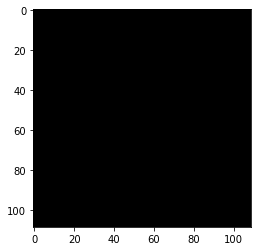

In [18]:
plt.imshow(canvas)